# Climate Change Analysis & Forecast

This notebook analyzes historical global temperature anomalies using **NASA GISTEMP** data and produces **50-year forecasts** using:
- Linear regression
- Polynomial regression (degree 3)

## Setup
Make sure the following packages are installed:
```bash
pip install pandas numpy matplotlib scikit-learn requests
```
Then run the cells below in order.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Load the NASA GISTEMP dataset
We will load the monthly global temperature anomalies table (includes annual aggregates) and alocate in a dataframe called "df".

In [33]:
# Step 1: Load NASA GISTEMP data
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df = pd.read_csv(url, skiprows=1)

## Load & clean
- Keep the year and the annual anomaly (column `J-D`)
- Convert anomaly to numeric
- Filter to 1880+ for consistency

In [34]:
# Step 2: Clean data
df = df.rename(columns={"Year": "year"})
df = df[["year", "J-D"]]
df = df.dropna()
df["temp_anomaly"] = pd.to_numeric(df["J-D"], errors="coerce")
df = df.dropna()
df = df[df["year"] >= 1880]

## Quick look at the historical series

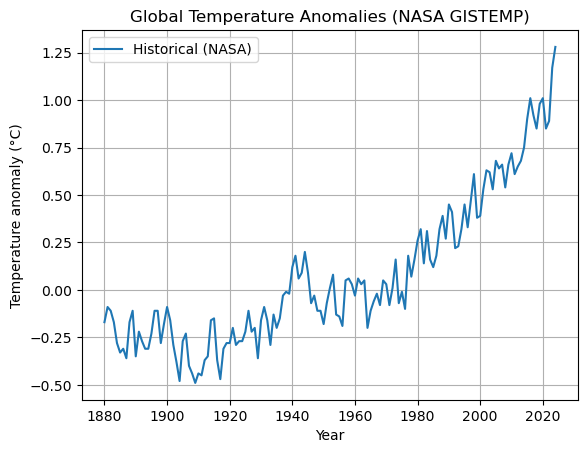

In [35]:
plt.plot(df["year"], df["temp_anomaly"], label="Historical (NASA)")
plt.title("Global Temperature Anomalies (NASA GISTEMP)")
plt.xlabel("Year")
plt.ylabel("Temperature anomaly (°C)")
plt.grid(True)
plt.legend()
plt.show()

## Train models
We will fit:
- A **linear regression** on `year`
- A **polynomial regression** (degree 3) using polynomial features of `year`

In [36]:
# Prepare data for prediction
X = df["year"].values.reshape(-1, 1)
y = df["temp_anomaly"].values

# Linear model
lin = LinearRegression().fit(X, y)

# Polynomial features and model (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
lin_poly = LinearRegression().fit(X_poly, y)

print("Coefficients trained.")


Coefficients trained.


## Model Evaluation on Historical Data
We compute R² and RMSE for both models to assess how well they fit the historical series.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions on historical data
y_lin_hist = lin.predict(X)
y_poly_hist = lin_poly.predict(X_poly)

# Evaluation metrics
r2_lin = r2_score(y, y_lin_hist)
rmse_lin = mean_squared_error(y, y_lin_hist, squared=False)

r2_poly = r2_score(y, y_poly_hist)
rmse_poly = mean_squared_error(y, y_poly_hist, squared=False)

print("=== Model Evaluation on Historical Data ===")
print(f"Linear Regression: R² = {r2_lin:.4f}, RMSE = {rmse_lin:.4f}")
print(f"Polynomial Regression (deg=3): R² = {r2_poly:.4f}, RMSE = {rmse_poly:.4f}")

=== Model Evaluation on Historical Data ===
Linear Regression: R² = 0.7631, RMSE = 0.1903
Polynomial Regression (deg=3): R² = 0.9109, RMSE = 0.1168


/Applications/ANACONDA_NEW/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Applications/ANACONDA_NEW/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Forecast next 50 years
We will extend predictions up to **2075**.

In [37]:
future_years = np.arange(df["year"].min(), 2076)
future_years_reshaped = future_years.reshape(-1, 1)

linear_pred = linear_model.predict(future_years_reshaped)
poly_pred = poly_model.predict(poly.transform(future_years_reshaped))

## Visualize historical data with both forecasts
We overlay the **linear** and **polynomial** predictions on top of the historical series.

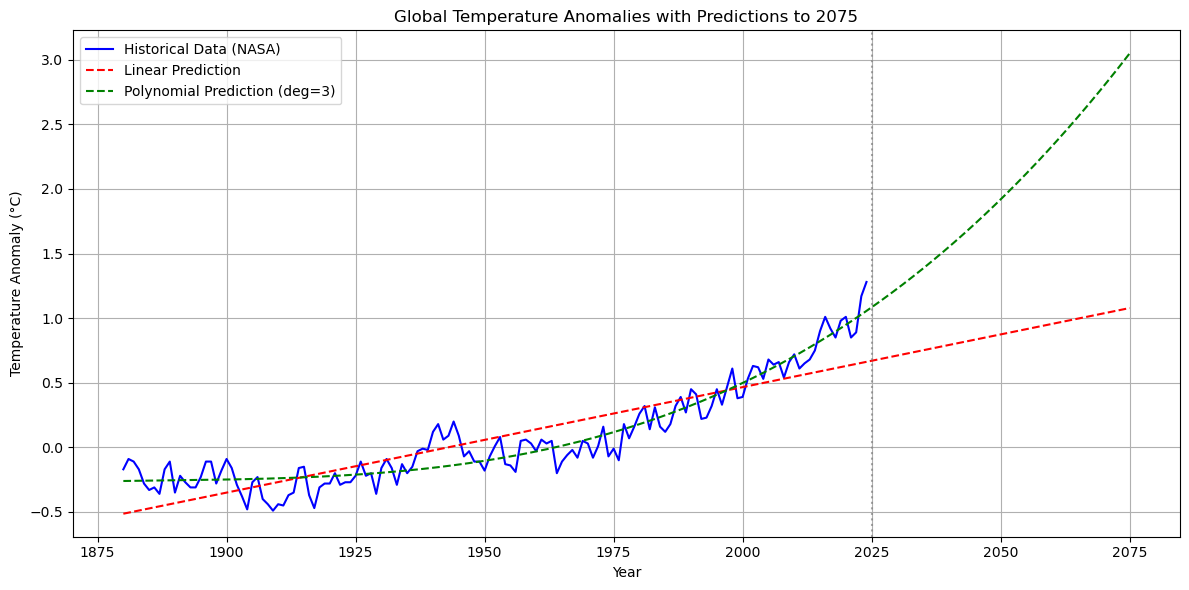

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["temp_anomaly"], label="Historical Data (NASA)", color="blue")
plt.plot(future_years, linear_pred, label="Linear Prediction", linestyle="--", color="red")
plt.plot(future_years, poly_pred, label="Polynomial Prediction (deg=3)", linestyle="--", color="green")
plt.axvline(x=2025, color="gray", linestyle=":", alpha=0.7)
plt.title("Global Temperature Anomalies with Predictions to 2075")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("climate_prediction_plot.png")
plt.show()